<a href="https://colab.research.google.com/github/jogong2718/AI_club/blob/main/3_Activation_functions_and_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Importing Dataset

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


One-Hot-Encode

In [ ]:
trainingLabelsohe = tf.keras.utils.to_categorical(training_labels)
testLabelsohe = tf.keras.utils.to_categorical(test_labels)

<font size = +3>New coding method for model structure

With past models, we structured them so they looked more visually appealing and easier to understand. Such as:
```
n = 5
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(), 
tf.keras.layers.Dense(n),
tf.keras.layers.Dense(n),
tf.keras.layers.Dense(10, activation = "softmax")
])
```
For this model, it is optimized for tweaking and adjusting parameters. From what we have learned, it is easy to see the large number of parameters that need to be tweaked for a successful model. 

We create a function to form a sequential model with the function parameters. The parameters:

- len_layers: number of hidden layers
- a_dense_list: a list of the number of units for each dense layer
- a_dropout_list: a list of the rates for each dropout layer
- drop: a boolean for if we want to include dropout layers or not

<font size = +3>Activation Functions

We have been introduced to one activation function called "softmax" used in the last dense layer of the model. A new activation function named "relu" is used for the hidden layers. relu is a very common activation function and is effectively a benchmark activation function for most deep learning models. It is prided on how quick it lets models reach their highest accuracy, or how fast the model "converges". With how popular the activation function is, it is one of the most simple. With an equation of $$f(x) = max(0,x)$$

This esentially means that if input is a number higher than 0, the output is the input, and if the input is less or equal to 0, the output is 0. The graph looks like this:


<img src="https://machinelearningmastery.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png">





In [ ]:
def run_model(len_layers, a_dense_list, a_dropout_list, drop):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  for i in range(len_layers):
    model.add(tf.keras.layers.Dense(a_dense_list[i], activation = "relu")) # we use relu for the hidden layers
    if drop:
      model.add(tf.keras.layers.Dropout(a_dropout_list[i]))
  model.add(tf.keras.layers.Dense(10, activation = "softmax"))
  return model

Calling the function

In [ ]:
len_layers = 3
a_dense_list = [128, 64, 32]
a_dropout_list = [0.1, 0.1, 0.1]
model = run_model(len_layers, a_dense_list, a_dropout_list, False)

One of the most important topics in machine learning and deep learning is the optimizer, gradient descent, and backpropogation. Now, I just threw 3 big words at you with absolutely no warning. To fully understand the intricacies of these topics, you would need to know linear algebra and multivariable calculus, knowledge that none of us have at this moment. 

### Optimization

An optimizer is an algorithm to search for the most optimal (some minimum value) on a loss surface. Recall the loss surface is how many mistakes the model is making, so it is intuitive that the desired point (the optimal point) is where the loss is small. The location where the loss is smallest (global minima) is the "best" parameters we need in our model.

Think of the y axis as the loss, and the x axis as the weights or parameters for our model when it is a linear model (third gif). When it is like the first gif, think of the z axis as the loss and the x and y axes as the weights or parameters.

<p align='center'>
    <img src="https://miro.medium.com/max/1400/1*47skUygd3tWf3yB9A10QHg.gif" width=400></img>
</p>

Today, there are many different upgrades of optimization algorithm. Please see below:

<p align='center'>
    <img src="https://user-images.githubusercontent.com/11681225/49325458-fc785480-f585-11e8-8d2a-9012d6024c6e.gif" width=400></img>
</p>

A 2D representation:

<p align='center'>
    <img src="https://adatis.co.uk/wp-content/uploads/GradientDescentGIF.gif" width=400></img>
</p>

### Gradient Descent

Gradient descent optimizers are algorithms used to minimize the loss function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. Essentially, they're a type of optimizer algorithm that uses a bit of nifty calculus, more specifically the derivative, to find the global minima.

### Back-Propogation

Back-propogation is essentially the application of gradient descent algorithms in each layer of a deep learning model. Essentially, it's gradient descent algorithms on top of gradient descent algorithms.

### Modifying the optimizer

Now we have a general idea of what the optimizer does, let's learn how to adjust its parameters. 

- learning rate: This is how big the step of each call of the optomization algorithm. Essentially, it dictates how fast or slow the model converges. Finding the right number for the learning rate is integral to building a good model. 

This image shows how differing learning rates can affect how the model learns.

<p align='center'>
    <img src="https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png" width=600></img>
</p>

- beta_1, beta_2, epsilon: You may notice that the names for these parameters are greek letters, this is because they reference variables in the adam equation: 


$$m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t$$
$$v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2$$ 

<br>

$$\hat{m}_t = \dfrac{m_t}{1 - \beta^t_1}$$
$$\hat{v}_t = \dfrac{v_t}{1 - \beta^t_2}$$

<br>

$$\theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{\hat{v}_t} + \hat{\epsilon}} \hat{m}_t$$

link to paper for Adam: https://arxiv.org/pdf/1412.6980.pdf

You don't need to know what these equations mean, but know it further adjusts the convergence rate of the model / learning speed. 

From me just tweaking the learning rate, the model is able to achieve a val_accuracy of 98.41%

proof 🙂:

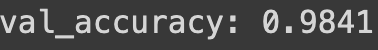

Try and further tweak the parameters to surpass this accuracy!

P.S, this notebook is **NOT** the 98.41% model

In [ ]:
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
)

In [ ]:
with tf.device('/device:GPU:0'):
  model.compile(
      optimizer = opt,
      loss = "categorical_crossentropy",
      metrics = ["accuracy"]
  )

In [ ]:
with tf.device('/device:GPU:0'):
  history = model.fit(
      training_images, trainingLabelsohe, 
      validation_data = (test_images, testLabelsohe),
      epochs = 50,
      batch_size = 20
  )

The max val_accuracy

In [ ]:
print(max(history.history["val_accuracy"]))

Run this cell to plot the results of the model's training

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['val_accuracy'])
plt.legend(['test_accuracy'])